'''
- fastest lap times from the last 10 years on each circuit
'''

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important;} </style>"))

In [38]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import time
import matplotlib as plot

In [2]:
website = 'https://www.formula1.com/en/results.html/2018/fastest-laps.html'
data = pd.read_html(website)
df1 = data[0][['Grand Prix','Driver','Car','Time']]
df1['Driver']

0     Daniel  Ricciardo  RIC
1      Valtteri  Bottas  BOT
2     Daniel  Ricciardo  RIC
3      Valtteri  Bottas  BOT
4     Daniel  Ricciardo  RIC
5       Max  Verstappen  VER
6       Max  Verstappen  VER
7      Valtteri  Bottas  BOT
8       Kimi  Räikkönen  RAI
9     Sebastian  Vettel  VET
10      Lewis  Hamilton  HAM
11    Daniel  Ricciardo  RIC
12     Valtteri  Bottas  BOT
13      Lewis  Hamilton  HAM
14     Kevin  Magnussen  MAG
15     Valtteri  Bottas  BOT
16    Sebastian  Vettel  VET
17      Lewis  Hamilton  HAM
18     Valtteri  Bottas  BOT
19     Valtteri  Bottas  BOT
20    Sebastian  Vettel  VET
Name: Driver, dtype: object

In [3]:
'''
write a loop function for each year
create a new df each time
create dictionary {year:table}

groupby grand prix, different car different color on chart?

'''
df = pd.DataFrame(columns = ['Grand Prix','Driver','Car','Time'])
years_fastestLap = {}

for i in range(0,9):
    website = 'https://www.formula1.com/en/results.html/201'+str(i)+'/fastest-laps.html'
    data = pd.read_html(website)
    years_fastestLap['201'+str(i)] = data[0]

cleaned_years_fastestLap = {}
for i in range(0,9):
    cleaned_years_fastestLap['201'+str(i)] = years_fastestLap['201'+str(i)][['Grand Prix','Driver','Car','Time']]
    
cleaned_years_fastestLap['2011']

,Grand Prix,Driver,Car,Time
0,Australia,Felipe Massa MAS,Ferrari,1:28.947
1,Malaysia,Mark Webber WEB,Red Bull Racing Renault,1:40.571
2,China,Mark Webber WEB,Red Bull Racing Renault,1:38.993
3,Turkey,Mark Webber WEB,Red Bull Racing Renault,1:29.703
4,Spain,Lewis Hamilton HAM,McLaren Mercedes,1:26.727
5,Monaco,Mark Webber WEB,Red Bull Racing Renault,1:16.234
6,Canada,Jenson Button BUT,McLaren Mercedes,1:16.956
7,Europe,Sebastian Vettel VET,Red Bull Racing Renault,1:41.852
8,Great Britain,Fernando Alonso ALO,Ferrari,1:34.908
9,Germany,Lewis Hamilton HAM,McLaren Mercedes,1:34.302


In [4]:
cleaned_years_fastestLap = {}
for i in range(0,9):
    cleaned_years_fastestLap['201'+str(i)] = years_fastestLap['201'+str(i)][['Grand Prix','Driver','Car','Time']]

In [61]:
years =list(cleaned_years_fastestLap.keys())
years

['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

In [74]:
monaco_FL = pd.DataFrame()
for i in range(0,9):
    monaco_FL = monaco_FL.append(cleaned_years_fastestLap['201'+str(i)].loc[cleaned_years_fastestLap['201'+str(i)]['Grand Prix'] == 'Monaco'])
    #monaco_FL['year'] = monaco_FL.append(monaco_FL['201'+str(i)])


'''
clean driver name
'''
monaco_FL['Driver'] = monaco_FL['Driver'].str.extract('(\s\D\D\D$)')


'''
set year as index

why do i have to put it after i change driver name
this makes it to a multilevel index...

'''

# year_list = []
# for i in range(0,9):
#     year_list.append('201'+str(i))
# year_list

#years =list(cleaned_years_fastestLap.keys())
monaco_FL['Year'] = list(cleaned_years_fastestLap.keys())
monaco_FL.set_index('Year')


,Grand Prix,Driver,Car,Time
Year,,,,
2010,Monaco,VET,RBR Renault,1:15.192
2011,Monaco,WEB,Red Bull Racing Renault,1:16.234
2012,Monaco,PER,Sauber Ferrari,1:17.296
2013,Monaco,VET,Red Bull Racing Renault,1:16.577
2014,Monaco,RAI,Ferrari,1:18.479
2015,Monaco,RIC,Red Bull Racing Renault,1:18.063
2016,Monaco,HAM,Mercedes,1:17.939
2017,Monaco,PER,Force India Mercedes,1:14.820
2018,Monaco,VER,Red Bull Racing TAG Heuer,1:14.260


In [63]:
monaco_FL['Time'] = pd.to_datetime(monaco_FL['Time'], format='%M:%S.%f')a


In [78]:
#monaco_FL['Time'].to_Timedelta()
pd.to_timedelta(monaco_FL.Time).astype(int)

ValueError: expected hh:mm:ss format before .

In [65]:
monaco_FL.set_index('Year')

,Grand Prix,Driver,Car,Time
Year,,,,
2010,Monaco,VET,RBR Renault,1900-01-01 00:01:15.192
2011,Monaco,WEB,Red Bull Racing Renault,1900-01-01 00:01:16.234
2012,Monaco,PER,Sauber Ferrari,1900-01-01 00:01:17.296
2013,Monaco,VET,Red Bull Racing Renault,1900-01-01 00:01:16.577
2014,Monaco,RAI,Ferrari,1900-01-01 00:01:18.479
2015,Monaco,RIC,Red Bull Racing Renault,1900-01-01 00:01:18.063
2016,Monaco,HAM,Mercedes,1900-01-01 00:01:17.939
2017,Monaco,PER,Force India Mercedes,1900-01-01 00:01:14.820
2018,Monaco,VER,Red Bull Racing TAG Heuer,1900-01-01 00:01:14.260


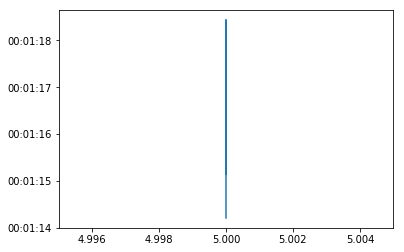

In [56]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


monaco_FL['Time'].plot(x = monaco_FL['Year'] )